In [5]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Mnist(nn.Module):

    def __init__(self):
        super(Mnist, self).__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(784, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        return x
    
net = Mnist()
print(net)


Mnist(
  (fc1): Linear(in_features=784, out_features=100)
  (fc2): Linear(in_features=100, out_features=10)
)


In [8]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home="../data")


In [10]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [13]:
len(mnist.data)

70000

In [18]:
len(mnist.target)

70000

In [17]:
len(mnist.data[0])

784

(array([ 6903.,  7877.,  6990.,  7141.,  6824.,  6313.,  6876.,  7293., 13783.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

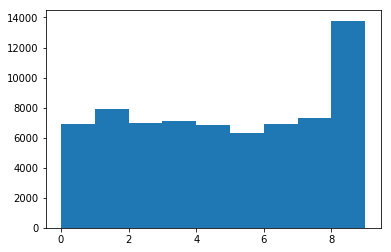

In [45]:
plt.hist(mnist.target, bins=range(10))

In [25]:
import torch
import torchvision
import torchvision.transforms as transforms

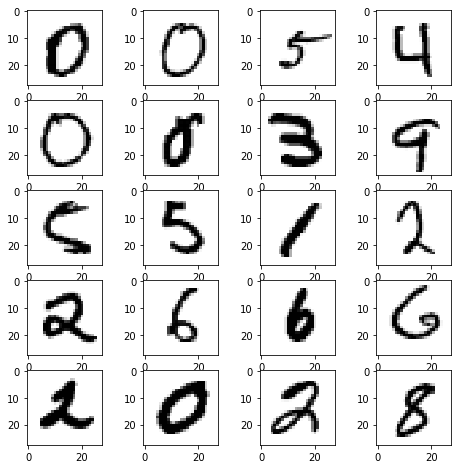

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from random import *

w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img =  mnist.data[randint(0, 70000)].reshape((28,28))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray_r')

